## Make circle plots

In [1]:
%load_ext rpy2.ipython



In [2]:
%%R

library(ggplot2)

yy_lengthen_comma <- function(input_df,grouping_col, col_2split){
  return_df = data.frame()
  input_df = as.data.frame(input_df)
  for (row_i in 1:nrow(input_df)){
    list = strsplit(input_df[row_i,col_2split],split = ",")[[1]]
    group_name = input_df[row_i,grouping_col]
    add_df = data.frame(group = rep(group_name,length(list)), list = list)
    return_df = rbind(return_df, add_df)
  }
  return_df
}

yy_circle_plt =function(df,out_name,grouping){
  #df = df[order(df$logFC),] <- we can order before, not included in function

  pdf(out_name,width = 5,height = 5)
  circos.par(start.degree = 90)
  chordDiagram(df,
               annotationTrack = c("grid"), big.gap = 10,directional = 1,
               grid.col = grouping,
               link.sort = TRUE)

  circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))}, bg.border = NA)
  circos.clear()
  dev.off()
}

In [3]:
%%R

dt = read.csv("dt_out/1_invivo_analysis/STRINGdb_selected_enrichment_PAGA_cellrank_driver_genes_top100genes.tsv", sep = "\t")


In [4]:
%%R
# install.packages("circlize")
library(circlize)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



In [5]:
%%R
# dt_topX <- head(dt[order(dt$signal, decreasing = TRUE),],5)
dt_topX =dt

In [6]:
%%R

# head(dt_top10)

dt_process = yy_lengthen_comma(dt_topX,"term.description","matching.proteins.in.your.network..labels.")
head(dt_process)

          group   list
 Cell adhesion  Itga6
 Cell adhesion   Hes1
 Cell adhesion Igfbp7
 Cell adhesion  Lamc1
 Cell adhesion    Mpz
 Cell adhesion Ctnna1


In [7]:
%%R
head(dt_process)

          group   list
 Cell adhesion  Itga6
 Cell adhesion   Hes1
 Cell adhesion Igfbp7
 Cell adhesion  Lamc1
 Cell adhesion    Mpz
 Cell adhesion Ctnna1


Only keep duplicated

In [8]:

%%R
list_counts <- table(dt_process$list)

# Filter rows where "list" items are repeated more than 2 times
dt_duplicated <- dt_process[dt_process$list %in% names(list_counts[list_counts > 2]), ]

# View the number of rows in the filtered dataset
nrow(dt_duplicated)



[1] 11


In [9]:
%%R
# dt_duplicated = head(dt_duplicated)

NULL


In [10]:
%%R
## this is just for saving the figure 
pdf("figures/chord_plot_enrichment_invivo_STRINGdb_16Feb2025.pdf",width = 3.5,height = 3.5)
par(cex = 0.5, mar = c(0, 0, 0, 0))
circos.par(start.degree = 90)
chordDiagram(dt_duplicated, annotationTrack = c("grid"), big.gap = 5,
             grid.col = hcl.colors(length(unique(dt_duplicated$list)) + length(unique(dt_duplicated$group)), "ag_Sunset"))
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)

circos.clear()

In [11]:
%%R
## this is just for saving the figure 
pdf("figures/chord_plot_enrichment_invivo_STRINGdb_16Feb2025_longform.pdf",width = 3.5,height = 3.5)
par(cex = 0.5, mar = c(0, 0, 0, 0))
circos.par(start.degree = 90)
chordDiagram(dt_process, annotationTrack = c("grid"), big.gap = 5,
             grid.col = hcl.colors(length(unique(dt_process$list)) + length(unique(dt_process$group)), "ag_Sunset"))
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)

circos.clear()

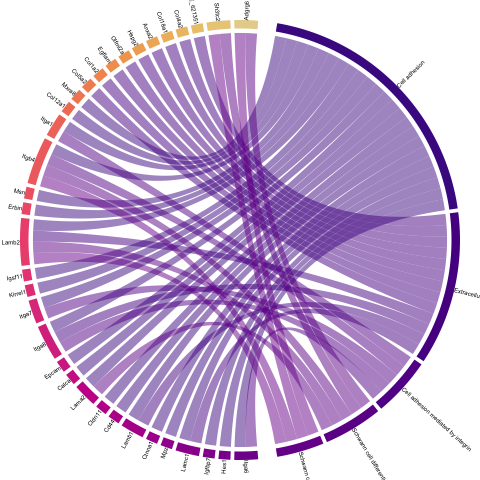

In [12]:
%%R
# pdf("fig/test.pdf",width = 7,height = 7)
par(cex = 0.5, mar = c(0, 0, 0, 0))
circos.par(start.degree = 90)

chordDiagram(dt_process, annotationTrack = c("grid"), big.gap = 5,
             grid.col = hcl.colors(length(unique(dt_process$list)) + length(unique(dt_process$group)), "ag_Sunset"))
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)

circos.clear()